# Question 1

a) Download the "Boston1.csv" database, and explore the data. Explanation about the dataset can be found here: http://www.clemson.edu/economics/faculty/wilson/R-tutorial/analyzing_data.html

Find the columns with missing values and filter them out of the data.

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.cross_validation  import train_test_split

boston_df = pd.read_csv('Boston1.csv')

# Reference http://chrisalbon.com/python/pandas_missing_data.html
boston_df = boston_df.dropna()


b) Divide the filtered data randomly into a train set (70% of the data) and test set (30% of the data).

In [5]:
train, test = train_test_split(boston_df, test_size = 0.3)
train.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,randCol,misData
40,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9,0.169066,4.0
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22,17.2,0.705740,4.0
44,0.12269,0.0,6.91,0,0.448,6.069,40.0,5.7209,3,233,17.9,389.39,9.55,21.2,0.820848,1.0
205,0.13642,0.0,10.59,0,0.489,5.891,22.3,3.9454,4,277,18.6,396.90,10.87,22.6,0.676513,1.0
202,0.02177,82.5,2.03,0,0.415,7.610,15.7,6.2700,2,348,14.7,395.38,3.11,42.3,0.145665,4.0


# Question 2

If you haven't done this previously, install the scikit-learn package for python.

a) On the train set, run a linear regression model as follows:
Divide the training set into explanatory variables (the X matrix with which we'll try to make a prediction) and a target variable (y, the value which we'll try to predict). Use the 'medv' attribute as the target variable y and the rest of the features as the X matrix. Run a linear regression model on those sets, and print the regression coefficients. 

In [6]:
X_train = train[train.columns.difference(["medv"])]
Y_train = train["medv"]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regression_model = regr.fit(X_train, Y_train)

# The coefficients
print('Coefficients: \n', regression_model.coef_)

('Coefficients: \n', array([ -6.17162693e-03,   1.03374071e-02,   3.55724567e+00,
        -1.13604440e-01,  -1.57376266e+00,   2.96523427e-02,
        -5.12179624e-01,  -1.89734420e+01,  -9.52433289e-01,
         3.24835035e-01,   1.03462808e+00,   3.61428480e+00,
        -1.16401237e-02,   4.41785947e-02]))


b) Use the linear regression model to predict the values of the test set's 'medv' column, based on the test set's other attributes. Print the Mean Squared Error of the model on the train set and on the test set.

In [7]:
X_test = test[test.columns.difference(["medv"])]
Y_test = test["medv"]

predicted_train_y = regr.predict(X_train)
predicted_test_y = regr.predict(X_test)

print("Mean squared error - Train set : %.2f"
      % np.mean((predicted_train_y - Y_train) ** 2))

print("Mean squared error - Test set : %.2f"
      % np.mean((predicted_test_y - Y_test) ** 2))

Mean squared error - Train set : 22.66
Mean squared error - Test set : 20.78


c) Usually, the MSE on the train set would be lower than the MSE on the test set, since the model parameters are optimized with respect to the train set. Is this the case in your output? Can you think of a reason why a regressor on a dataset would behave differently (i.e, the MSE on the test set would be smaller than on the train set)?

In [8]:
"""In the previous exercise the Train set generates a smaller MSE than in the Test set.
   Some reasons that might explain why the Test set would generate a smaller error in the training set 
   could be that the training set has many of the harder cases to predict and  the test set has many of the easy cases
   """

'In the previous exercise the Train set generates a smaller MSE than in the Test set.\n   Some reasons that might explain why the Test set would generate a smaller error in the training set \n   could be that the training set has many of the harder cases to predict and  the test set has many of the easy cases\n   '

d) Add some noise (with mean=0, std=1) to the test set's y, and predict it again. What happened to the MSE? Why?

In [76]:
noise_y = np.random.normal(0,1,len(Y_test))
Y_test_with_noise = Y_test + noise_y

print("Mean squared error - Test set : %.2f"
      % np.mean((predicted_test_y - Y_test_with_noise) ** 2))

"""The MSE increased a little. This can be explained by the fact that our prediction model does not
    considered the noise added to our target variable when we trained it with the train set"""

Mean squared error - Test set : 25.42


'The MSE increased a little. This can be explained by the fact that our prediction model does not\n    considered the noise added to our target variable when we trained it with the train set'

# Question 3

a) Create a Recursive feature elimination model, with a linear regression estimator, that selects half of the original number of features. Hint: Check the feature_selection module in scikit-learn.

In [91]:
from sklearn.feature_selection import RFE

# create a base classifier used to evaluate a subset of attributes
regr = linear_model.LinearRegression()

# create the RFE model and select 3 attributes
rfe = RFE(regr, len(X_train.columns)/2)
rfe = rfe.fit(X_train, Y_train)
# summarize the selection of the attributes
print(rfe.ranking_)
selected_features_index = rfe.support_
print "selected features:",X_train.columns[selected_features_index]

[6 8 1 4 1 2 1 1 1 3 1 1 7 5]
selected features: Index([u'chas', u'dis', u'lstat', u'nox', u'ptratio', u'randCol', u'rm'], dtype='object')


b) Use the feature elimination model on the full database (after filtering columns with missing values, before partitioning into train/test). Print the features that were selected. Remember that we separate the 'medv' attribute to be our y, while the rest of the attributes in the dataset serve as features to learn from.

In [93]:
full_train_X = boston_df[boston_df.columns.difference(["misData", "medv"])]
full_train_Y = boston_df["medv"]

# create a base classifier used to evaluate a subset of attributes
regr = linear_model.LinearRegression()
rfe = RFE(regr, len(full_train_X.columns)/2)
rfe = rfe.fit(full_train_X, full_train_Y)

# summarize the selection of the attributes
print(rfe.ranking_)
selected_features_index = rfe.support_
print "selected features:",X_train.columns[selected_features_index]

[8 7 1 3 1 4 1 1 1 2 1 1 6 5]
selected features: Index([u'chas', u'dis', u'lstat', u'nox', u'ptratio', u'randCol', u'rm'], dtype='object')


c) We'd like to find out the optimal number of features. Create feature elimination models (with linear regression estimators) for every number of features between 1 and n (where n = all the original features, 'medv' excluded). For each number of features, run a linear regression as in Question 2, only on the selected features, in order to predict 'medv'. Print/plot the Mean Sqaured Error for each number of features.

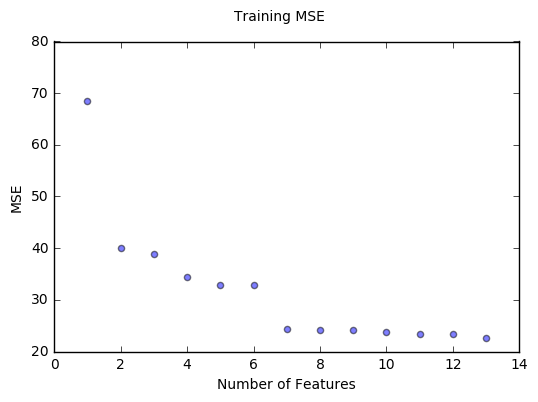

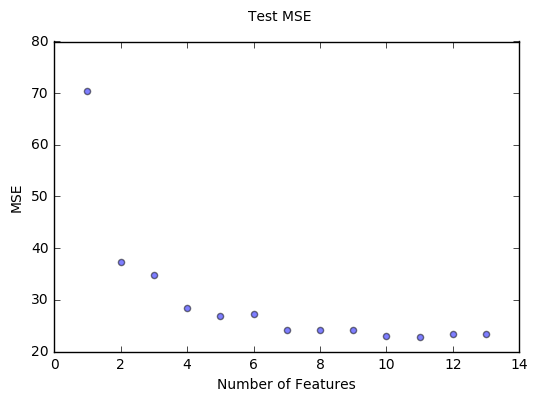

[70.33563901203419, 37.292205508119395, 34.82230438124524, 28.369095360130103, 26.900190768743784, 27.202079714307093, 24.10801900900635, 24.22273656747072, 24.066580170779588, 23.00197113755385, 22.747786584038565, 23.32199319701606, 23.31338034510546]


In [154]:
MSE_training_list = []
MSE_test_list = []

X_train = train[train.columns.difference(["misData","medv"])]
Y_train = train["medv"]

X_test = test[test.columns.difference(["medv","misData"])]
Y_test = test["medv"]

# Eliminating the target varibale and the missing table variable
for ft_number in xrange(1, len(X_train.columns)):
    
    # Select 
    regr = linear_model.LinearRegression()
    rfe = RFE(regr, ft_number)
    rfe = rfe.fit(X_train, Y_train)
    
    selected_features_index = rfe.support_
    selected_features = X_train.columns[selected_features_index]
    train_X_only_selected_ft = X_train[selected_features]
    
    # Execute the prediction
    regr = linear_model.LinearRegression()
    regr.fit(train_X_only_selected_ft, Y_train)
    
    # Do for both the training and test set 
    predicted_train_y = regr.predict(train_X_only_selected_ft)
    
    test_X_only_selected_ft = X_test[selected_features]
    predicted_test_y = regr.predict(test_X_only_selected_ft)
    
#     Print the MSE errors
    temp_training_MSE = np.mean((predicted_train_y - Y_train) ** 2)
    MSE_training_list.append(temp_training_MSE)
    
    temp_test_MSE = np.mean((predicted_test_y - Y_test) ** 2)
    MSE_test_list.append(temp_test_MSE)
    
# Plot the Charts 
range_of_features = xrange(1,len(X_train.columns))

plt.scatter(range_of_features, MSE_training_list, s=20, alpha=0.5)
plt.suptitle('Training MSE')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.show()

plt.scatter(range_of_features, MSE_test_list, s=20, alpha=0.5)
plt.suptitle('Test MSE')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.show()

print MSE_test_list
    

d) Conclude the optimal number of features for this task. Think about the cost of adding for data vs the benefit of a more accurate prediction. Explain your answer.

In [ ]:
"""The lower MSE for the test set is generated from a prediction with 11 features,
    but since we could taking into account the work for gathering new data and 
    that selecting 7 features the MSE would increase only aprox. 5% we could follow with
    just 7 features in our prediction model..
"""

# Question 4

Perform a cross-validation of the linear regression on the train set with K=5. Print the CV scores for each repeat.

In [171]:
from sklearn import datasets, linear_model
from sklearn.cross_validation import cross_val_score
X_train = train[train.columns.difference(["misData","medv"])]
Y_train = train["medv"]

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, X_train, Y_train, cv=5)
print scores

[ 0.67166865  0.81406687  0.79902521  0.58735083  0.59872062]
